In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('/content/drive/MyDrive/DIO/PROJETO_PANDAS/Datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/DIO/PROJETO_PANDAS/Datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/DIO/PROJETO_PANDAS/Datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/DIO/PROJETO_PANDAS/Datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/DIO/PROJETO_PANDAS/Datasets/Salvador.xlsx')

In [3]:
#Juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

# **Tratando Valores Faltantes**

In [8]:
#Linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [9]:
#Substituindo valores nulo pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [10]:
#Substituindo valores nulo por zero
df["Vendas"].fillna(0, inplace=True)

In [11]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

# **Criando novas colunas**

In [12]:
df['Receitas'] = df['Vendas'].mul(df['Qtde'])

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [15]:
df['Receitas'].max()

3544.0

In [16]:
#TOP 3 colunas Receitas
df.nlargest(3, 'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [17]:
#Down 3 colunas Receitas
df.nsmallest(3, 'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


# **Trabalhando com datas**

In [18]:
#Calculando diferença de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,diferenca_dias
0,Aracaju,2018-01-01,142.00,1520,1,142.00,0 days
1,Aracaju,2018-01-01,14.21,1522,6,85.26,0 days
2,Aracaju,2018-01-01,71.55,1520,1,71.55,0 days
3,Aracaju,2018-01-01,3.01,1521,7,21.07,0 days
4,Aracaju,2018-01-01,24.51,1522,8,196.08,0 days


In [20]:
#Trimestre
df['Trimestre'] = df['Data'].dt.quarter

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,diferenca_dias,Trimestre
0,Aracaju,2018-01-01,142.00,1520,1,142.00,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,0 days,1


# **Visualização de Dados**

In [22]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

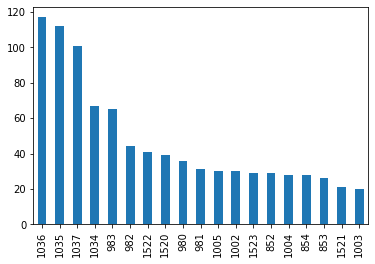

In [27]:
#Gráfico de Barras
df['LojaID'].value_counts(ascending=False).plot.bar();

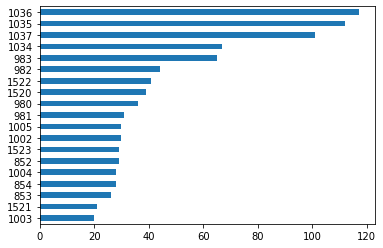

In [26]:
#Gráfico de Barras Horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

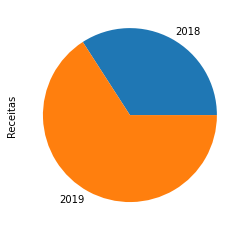

In [30]:
#Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receitas'].sum().plot.pie();

Text(0, 0.5, 'Total Vendas')

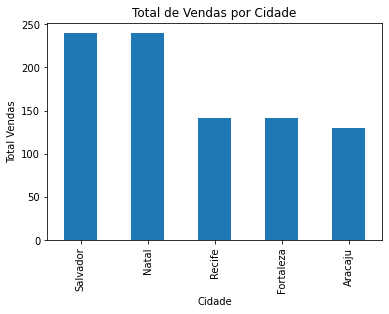

In [31]:
#Adicionando Título e alterando nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="Total de Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Text(0, 0.5, 'Total Vendas')

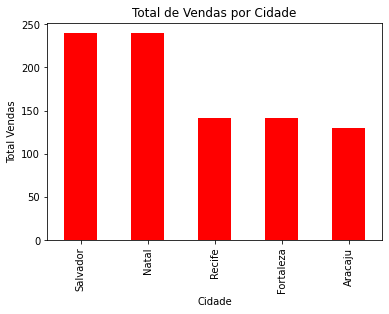

In [33]:
#Adicionando Cor
df['Cidade'].value_counts().plot.bar(title="Total de Vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [34]:
#Alterando estilo
plt.style.use('ggplot');

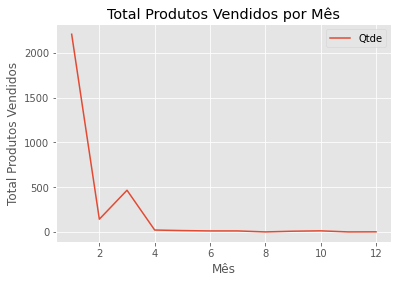

In [39]:
#Total Produtos Vendidos por Mês
df.groupby(df['Data'].dt.month)['Qtde'].sum().plot(title="Total Produtos Vendidos por Mês")
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend();

In [40]:
df.groupby(df['Data'].dt.month)['Qtde'].sum()

Data
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [41]:
df2019 = df[df['Data'].dt.year == 2019]

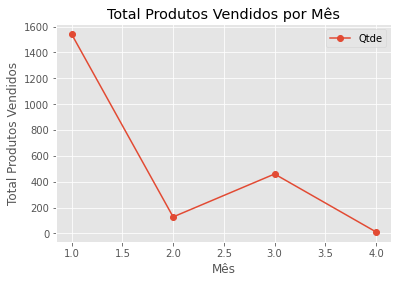

In [45]:
#Total Produtos Vendidos por Mês
df2019.groupby(df2019['Data'].dt.month)['Qtde'].sum().plot(marker='o', title="Total Produtos Vendidos por Mês")
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend();

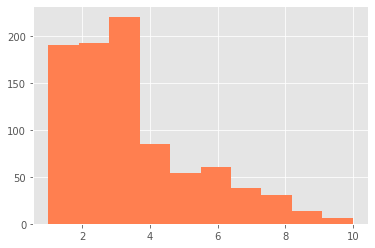

In [50]:
#Histograma
plt.hist(df['Qtde'], color='coral');

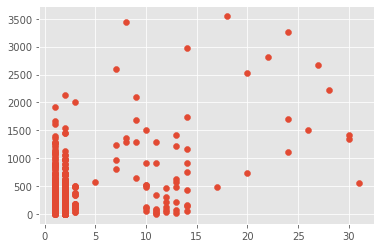

In [53]:
#Scatter Plot
plt.scatter(x=df2019['Data'].dt.day, y=df2019['Receitas']);

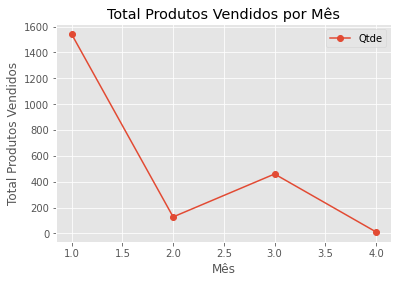

In [56]:
#Salvando Gráfico em png
df2019.groupby(df2019['Data'].dt.month)['Qtde'].sum().plot(marker='o')
plt.title("Total Produtos Vendidos por Mês")
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend()
plt.savefig('GraficoQtdeMes.png');
